# 使用sklearn库完成20类新闻文本分类

### 1.导入相关库

In [2]:
# 数据集
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# 神经网络模型
from sklearn.neural_network import MLPClassifier
# 模型评估
from sklearn.metrics import accuracy_score
# 保存模型
import joblib
# 数据绘制
import matplotlib.pyplot as plt
%matplotlib inline
# 系统相关
import os

### 2.加载数据集

In [3]:
# 加载所有数据集(原始数据)
newsgroups = fetch_20newsgroups(subset='all')
# 提取特征(文本信息转换为向量特征)
vectorizer = TfidfVectorizer()  # TF-IDF特征提取器
X = vectorizer.fit_transform(newsgroups.data)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, newsgroups.target, test_size=0.25, random_state=42)

观察数据集内容

In [16]:
newsgroups.data[0]  # 第一条新闻内容

"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [14]:
list(newsgroups.target_names)  # 所有类别名称，共20类

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [20]:
newsgroups.target.shape  # 18000条新闻数据

(18846,)

观察数据集格式

In [21]:
X.shape  # 18000条新闻数据，每个数据包含10000个特征

(18846, 173762)

### 3.构建模型

In [12]:
# 加载已有模型
if os.path.exists('mlp_42_27.pkl'):
    mlp = joblib.load('mlp_42_27.pkl')
else:  # 创建分类神经网络模型
    mlp = MLPClassifier(hidden_layer_sizes=(100,),  # 隐藏层神经元数目 1层 100个
                        max_iter=5,  # 最大迭代次数
                        activation='relu',  # 激活函数 默认为relu
                        solver='adam',  # 优化算法 默认为adam
                        batch_size='auto',  # 批处理大小 默认为'auto'
                        verbose=1,  # 显示信息 10次显示一次
                        learning_rate_init=0.001,  # 学习率 默认为0.001
                        early_stopping=True,  # 是否使用早停 默认为False
                        validation_fraction=0.1,  # 验证集比例 默认为0.1 用于计算模型性能判断是否早停
                        n_iter_no_change=10,  # 早停轮数 默认为10 次数内准确率不变则停止训练
                        tol=1e-4,  # 误差最小值 默认为1e-4
                        random_state=42,)

### 4.训练模型

In [10]:
# 训练模型
# mlp.fit(X_train, y_train)
# 保存模型
joblib.dump(mlp, 'newsgroups_mlp.pkl')

E:\ProgramData\anaconda3\envs\TextClassification\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")

KeyboardInterrupt



### 5.绘制数据

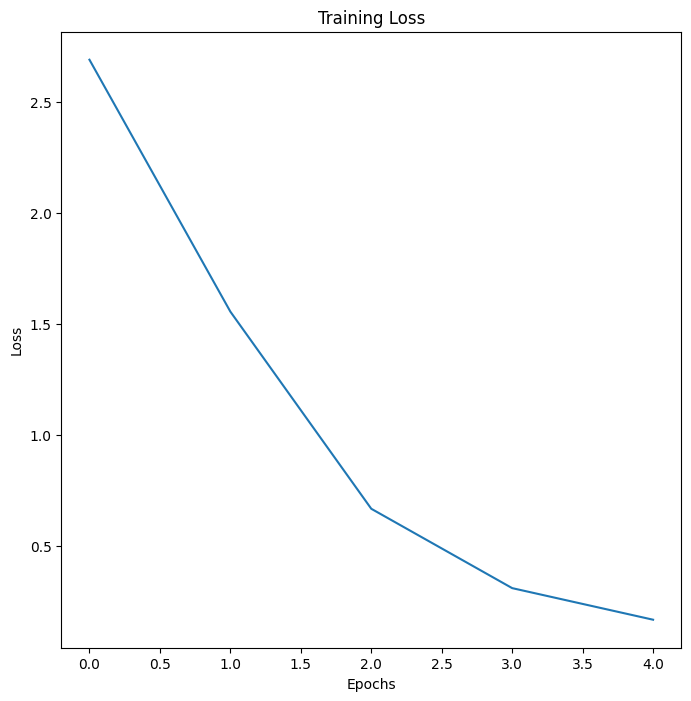

In [13]:
# 数据绘制
losses = mlp.loss_curve_
plt.figure(figsize=(8, 8))  # 设置画布大小，画面异常时更改
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('images/training_loss_42_27.png')
plt.show()

### 6.测试模型

In [14]:
# 预测测试集
y_pred = mlp.predict(X_test)
# 打印对比预测结果和实际结果
print("Predicted labels:\n", y_pred)
print("True labels:\n", y_test)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Predicted labels:
 [ 9 12 14 ...  9  3  8]
True labels:
 [ 9 12 14 ...  9  3  8]
Accuracy: 92.57%
